<a href="https://colab.research.google.com/github/AAV-VirginiaTech/YOLOTrainingForDrone/blob/main/YOLODroneTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drone YOLO Training Colab
This colab project will walk you through training a YOLO model for use on a drone.

Created by Carter Hawkins for AAV Design Team and CS 2104 assignment

<div>
    <a href="https://github.com/AAV-VirginiaTech/YOLOTrainingForDrone"><img src="https://badgen.net/badge/icon/GitHub?icon=github&label" alt="Open In Github">
</div>

Click to get to main folder for Colab Project
/content/YOLOTrainingForDrone

Basically just run all the code snippets below to train the YOLO model!

## Setup
Prepare your Google Colab for training

### Copy Files From Github
Run the code snippet below to copy all required files.

In [ ]:
!git clone https://github.com/AAV-VirginiaTech/YOLOTrainingForDrone

### Install Dependencies
Run the code snippet below to install required dependencies

In [ ]:
!uv pip install ultralytics
import ultralytics
ultralytics.checks()

### Get GPU Access

Follow this link to get the education version of Google Colab to get access to more powerful GPUs

https://colab.research.google.com/signup

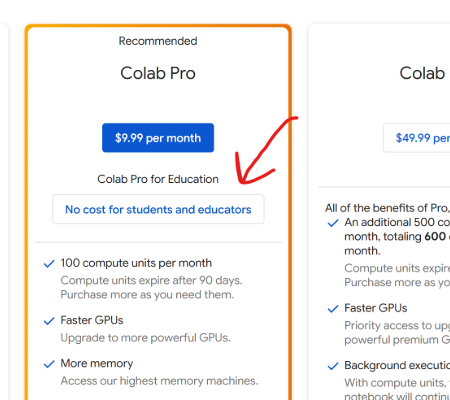

Run code snippet below to check GPU access

In [ ]:
!nvidia-smi

### Add your own objects and background images

You can replace the images contained in the
/content/YOLOTrainingForDrone/input/objects
with the images of the objects you want to train (or just keep the sample ones).

You can replace the images contained in the
/content/YOLOTrainingForDrone/input/backgrounds
with the images of the backgrounds you want to train (or just keep the sample ones).

### Create YAML File
Create a YAML file based on the images contained within your objects


In [ ]:
import yaml
import os

# Path to your objects folder (contains car/, plane/, tent/, etc.)
objects_dir = "/content/YOLOTrainingForDrone/input/objects"

# Dictionary to store class names
class_names = []

# Loop through each subfolder in objects/
for folder in sorted(os.listdir(objects_dir)):
    folder_path = os.path.join(objects_dir, folder)

    # Only process directories
    if not os.path.isdir(folder_path):
        continue

    # Check if the folder contains at least one PNG file
    png_files = [
        f for f in os.listdir(folder_path)
        if f.lower().endswith(".png")
    ]

    if png_files:
        class_names.append(folder)  # Use folder name as class label

# Build YOLO "names" dictionary: {0: "car", 1: "plane", 2: "tent", ...}
names_dict = {i: name for i, name in enumerate(class_names)}

# YOLO dataset config structure
data = {
    'path': '/content/YOLOTrainingForDrone/output',
    'train': '/content/YOLOTrainingForDrone/output/images/train/',
    'val': '/content/YOLOTrainingForDrone/output/images/val/',
    'names': names_dict
}

# Output YAML file path
output_file = "/content/YOLOTrainingForDrone/config.yaml"

# Write YAML file
with open(output_file, 'w') as yaml_file:
    yaml.dump(data, yaml_file, sort_keys=False)

print("Generated class labels:", names_dict)


## Step 1: Generate Images
Create your training images for the Yolo model

### Run image generation python code
Run the code snippet below to run the python code to generate the images needed to train the Yolo model

In [ ]:
import sys
sys.path.append('/content/YOLOTrainingForDrone/code')

import generate
generate.generate_training_data()

### See output

Go to this path to see the images that were generated

/content/YOLOTrainingForDrone/output/images

## Step 2: Split images into groups

Now we will split the images into two groups: training and validation.

Run the code snippet below to run the python script to do this


In [ ]:
import sys
sys.path.append('/content/YOLOTrainingForDrone/code')

import train_val_split

train_val_split.create_split()


There will now be two folders at this path
/content/YOLOTrainingForDrone/output/images

## Step 3: Train the model
Use the images we generated to train the yolo model.
This step will take some time so be patient.

Run the code snippet below to train the Yolo model.

In [ ]:
from ultralytics import YOLO

# Load model
model = YOLO('/content/YOLOTrainingForDrone/basemodel/yolo11n.pt')
print("Starting model training...")

try:
    # Train the model
    results = model.train(
        data='/content/YOLOTrainingForDrone/config.yaml',
        epochs=30, #Change to 100 if you are training a production model
        imgsz=640,
        batch=34,
        name='/content/YOLOTrainingForDrone/TrainedModel',
        device=0,      # GPU
        augment=True,  # Enable all augmentations
        hsv_h=0.014,   # Hue
        hsv_s=0.5,     # Saturation
        hsv_v=0.5      # Value/brightness
    )

    print("Training complete.")
    print(f"Model and results saved to: {results.save_dir}")

except Exception as e:
    print(f"An error occurred during training: {e}")


Your trained yolo model is now contained in this folder named best.pt

/content/YOLOTrainingForDrone/TrainedModel/weights

## Step 4: Validation Testing
Test our newly trained

Run the code snippet below to test our newly trained model based on the images in the validation folder

In [ ]:
import sys
sys.path.append('/content/YOLOTrainingForDrone/tests')

import test_model
test_model.run_predictions()

## Step 5: Try out the Yolo Model

Use your webcam below to try out your newly trained model.

The code will fail the first time it runs. You need to give camera permissions for it to work!!!

Adapted from this other Colab Project (Had to fix to make it work for yolo models): https://colab.research.google.com/drive/1QnC7lV7oVFk5OZCm75fqbLAfD9qBy9bw?usp=sharing

Run the code snippet below to test out your YOLO Model

In [ ]:
import sys, importlib
sys.path.append("/content/YOLOTrainingForDrone/WebcamPreview")

import yolo_webcam
importlib.reload(yolo_webcam)

yolo_webcam.start_yolo_webcam()
